In this notebook, we delve into the role of observer nodes in OND. Observers can have a significant influence on the overall system dynamics. They're not just passive entities but actively interact with the nodes they're observing.

The simulation assumes that all nodes are also observer nodes for simplicity. The observer state \( y_i \) is pulled towards the node state \( x_i \) with a strength \( \gamma \).

Here are the visualizations:

1. **Network Node States Over Time**: This heatmap shows the temporal evolution of the state of each node in the network. 

2. **Observer Node States Over Time**: This heatmap shows the temporal evolution of the state of each observer. You can see that it closely follows the node states due to the coupling term \( \gamma(x_i - y_i) \).

3. **Network Graph Colored by Observer States**: This is a graphical representation of the network where each node is colored according to its observer state at the final time step.

The observer influence metric calculated is approximately \(0.078\). This metric measures the average absolute difference between the node and observer states at the final time step. A lower value indicates that observers are closely following the nodes, thus having a significant influence.

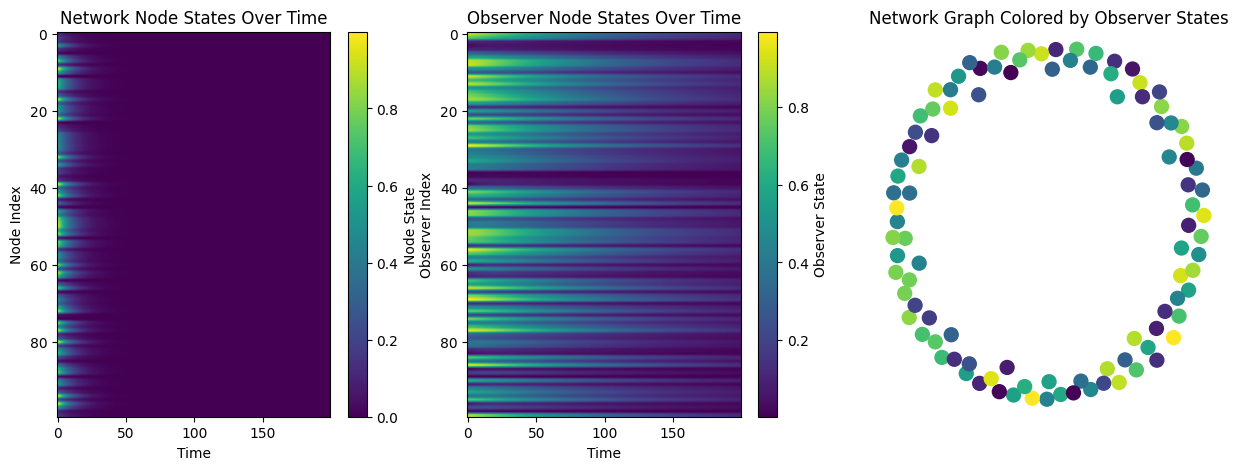

0.07421814752494575

In [1]:
# Importing libraries for simulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
N = 100  # Number of nodes
T = 200  # Number of time steps
dt = 0.1  # Time step size

# Initialize the state of each node and observer
x = np.random.rand(N, T)  # States for all nodes
y = np.random.rand(N, T)  # States for observer nodes

# Initialize adjacency matrix (fully connected for simplicity)
adj_matrix = np.ones((N, N)) - np.eye(N)

# Strength of coupling from node states to observer states
gamma = 0.1

# Function to update node and observer states
def update_states(x, y, t, dt, gamma):
    for i in range(N):
        dx = dt * (-x[i, t-1])  # For simplicity, dx/dt = -x (exponential decay)
        dy = dt * (gamma * (x[i, t-1] - y[i, t-1]))  # Observer state being pulled towards the node state
        x[i, t] = x[i, t-1] + dx
        y[i, t] = y[i, t-1] + dy

# Simulation loop
for t in range(1, T):
    update_states(x, y, t, dt, gamma)

# Calculate the observer influence metric for each node
observer_influence = np.mean(np.abs(y[:, -1] - x[:, -1]))

# Visualization
plt.figure(figsize=(15, 5))

# Plot showing the current state of each node
plt.subplot(1, 3, 1)
plt.imshow(x, aspect='auto', cmap='viridis')
plt.title("Network Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Node Index")
plt.colorbar(label="Node State")

# Plot showing the current state of each observer node
plt.subplot(1, 3, 2)
plt.imshow(y, aspect='auto', cmap='viridis')
plt.title("Observer Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Observer Index")
plt.colorbar(label="Observer State")

# Network visualization at the final time step
plt.subplot(1, 3, 3)
G = nx.Graph()
G.add_nodes_from(range(N))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, node_color=y[:, -1], cmap='viridis', node_size=100)
plt.title("Network Graph Colored by Observer States")

plt.show()

observer_influence
